In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
df=pd.read_excel("E Commerce Dataset.xlsx",sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
#checking the dimension of the dataset
df.shape

(5630, 20)

In [4]:
df.duplicated().sum()

0

In [5]:
#checking for null values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

#### Value counts of each of the categorical variables


In [7]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(i)
        print()
        print("The values are:")
        print(df[i].value_counts())
        print()

PreferredLoginDevice

The values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

PreferredPaymentMode

The values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Gender

The values are:
Male      3384
Female    2246
Name: Gender, dtype: int64

PreferedOrderCat

The values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

MaritalStatus

The values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



Handling missing values

In [8]:
df1=df.copy()

In [9]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [10]:
#calculating number of null values in each columns

for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i)
        print("Total null values:", df[i].isnull().sum())
        print("Datatype is :", df[i].dtypes)
        print()

Tenure
Total null values: 264
Datatype is : float64

WarehouseToHome
Total null values: 251
Datatype is : float64

HourSpendOnApp
Total null values: 255
Datatype is : float64

OrderAmountHikeFromlastYear
Total null values: 265
Datatype is : float64

CouponUsed
Total null values: 256
Datatype is : float64

OrderCount
Total null values: 258
Datatype is : float64

DaySinceLastOrder
Total null values: 307
Datatype is : float64



converting churn variable to object

In [11]:
df['Churn']=df['Churn'].astype('object')
df['CityTier']=df['CityTier'].astype('object')

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00


Filling missing values with it's median values

In [13]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i].fillna(df[i].median(),inplace=True)


In [14]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [15]:
# calculating average cashback
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

# Percentage of customer churn
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


### Exploratory Data Analysis

Lets make a list of the categorical and numerical variables these will be helpful in analysing the data efficiently

In [16]:
category=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        category.append(i)
    else:
        num.append(i)
print('Category = ',category)
print('num = ',num)

Category =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['CustomerID', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order']


In [17]:
df[category].describe().transpose()

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [18]:
for i in category:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

0    4682
1     948
Name: Churn, dtype: int64


PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


CityTier

1    3666
3    1722
2     242
Name: CityTier, dtype: int64


PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='count'>

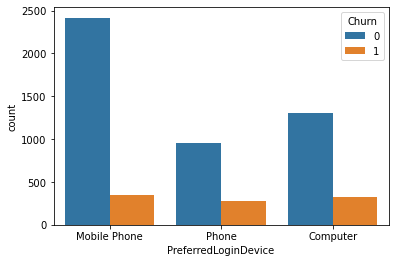

In [19]:
sns.countplot(x="PreferredLoginDevice",hue="Churn",data=df)

<AxesSubplot:xlabel='CityTier', ylabel='count'>

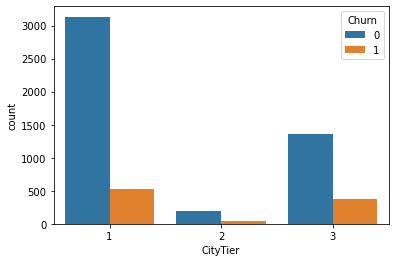

In [20]:
sns.countplot(x="CityTier",hue="Churn",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

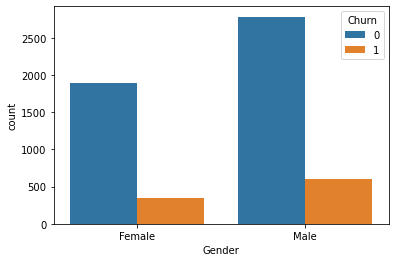

In [22]:
sns.countplot(x="Gender",hue="Churn",data=df)

<AxesSubplot:xlabel='PreferedOrderCat', ylabel='count'>

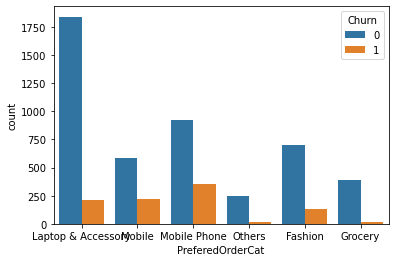

In [23]:
sns.countplot(x="PreferedOrderCat",hue="Churn",data=df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

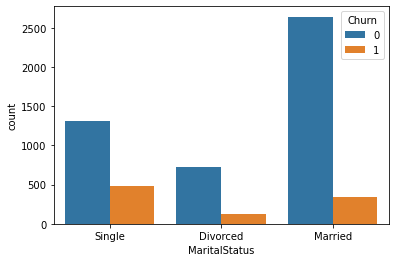

In [24]:
sns.countplot(x="MaritalStatus",hue="Churn",data=df)

In [25]:
df[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.250000,52815.50,54222.7500,55630.00
Tenure,5630.0,10.134103,8.357951,0.0,3.000000,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.000000,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.000000,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.000000,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.000000,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.000000,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.000000,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.000000,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.000000,1.00,2.0000,16.00


#### Analysing Churn by each Variable


In [27]:
# defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
# this was done so that we can quickly automate making such dataframes

d={}

# running loop for storing the calculating and storing the values in the relevant dataframes  
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),round(df.groupby(i).Churn.sum()*100/df[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )

In [28]:
for i in df.columns:
    print(i)
    print(d[i])
    print()

CustomerID
      CustomerID  Customers_churned  Total_Customers  perc_of_total_cust
0          50001                  1                1               100.0
1          50002                  1                1               100.0
2          50003                  1                1               100.0
3          50004                  1                1               100.0
4          50005                  1                1               100.0
...          ...                ...              ...                 ...
5625       55626                  0                1                 0.0
5626       55627                  0                1                 0.0
5627       55628                  0                1                 0.0
5628       55629                  0                1                 0.0
5629       55630                  0                1                 0.0

[5630 rows x 4 columns]

Churn
   Churn  Total_Customers  Total_Customers  Total_Customers
0      0             

### One hot encoding

In [30]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order'],
      dtype='object')

In [31]:
# performing one hot encoding using get_dummies method
df=pd.get_dummies(df, columns=['Churn','PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 
                               'Gender', 'PreferedOrderCat', 'MaritalStatus' ],
                  drop_first=True)

In [32]:
col=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
           'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order' ]

for i in col:
    df[i]=df[i].astype(float)

In [33]:
float_num=[]
for i in df.columns:
    if df[i].dtype=='float':
        float_num.append(i)

### Scaling the data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

features=df[float_num]
features=scaler.fit_transform(features)

In [35]:
df[float_num]=features

In [36]:
df

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,-0.733989,-1.146379,0.092654,-0.672900,-0.772992,1.852616,1.584290,-1.301849,-0.385940,...,0,0,0,0,1,0,0,0,0,1
1,50002,-0.135704,-0.906721,0.092654,0.303750,-0.048392,1.078430,1.584290,-0.187872,-0.924305,...,0,1,1,0,0,1,0,0,0,1
2,50003,-0.135704,1.729519,-1.324850,0.303750,-0.048392,0.691336,1.584290,-0.466367,-0.924305,...,0,0,1,0,0,1,0,0,0,1
3,50004,-1.212618,-0.067917,-1.324850,0.303750,1.400807,1.465523,-0.631198,2.040082,-0.924305,...,0,0,1,0,1,0,0,0,0,1
4,50005,-1.212618,-0.427405,0.092654,-0.672900,1.400807,-0.469944,-0.631198,-1.301849,-0.385940,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,-0.016046,1.729519,0.092654,-1.649551,-1.497592,0.691336,-0.631198,0.647610,-0.385940,...,0,0,1,0,1,0,0,0,1,0
5626,55627,0.342925,-0.307575,0.092654,1.280401,1.400807,0.691336,-0.631198,0.090622,-0.385940,...,0,0,1,0,0,0,0,0,1,0
5627,55628,-1.092961,-0.547234,0.092654,-1.649551,0.676207,-0.469944,1.584290,1.483093,-0.385940,...,0,0,1,0,1,0,0,0,1,0
5628,55629,1.539497,-0.786892,1.510158,1.280401,0.676207,-0.082850,-0.631198,-0.187872,0.152425,...,0,0,1,0,1,0,0,0,1,0


### Test_Train_Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#creating feature variable X and Target variable Y

X = df.drop(['Churn_1','CustomerID'],axis=1)
y = df['Churn_1']

# splitting the dataset into training set(80%) and test set(20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

### Building Classification models

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
#predicting the value for new data
ytest_predict = model_lr.predict(X_test)

In [42]:
# Accuracy - Test Data
log_model_score= (model_lr.score(X_test, y_test)*100 )
print(log_model_score, '%')

89.52042628774423 %


### SVM

In [43]:
from sklearn.svm import SVC

In [44]:
model_svm = SVC(kernel="linear", probability=True)
model_svm.fit(X_train, y_train)



SVC(kernel='linear', probability=True)

In [45]:
#predicting the value for new data
ytest_predict = model_svm.predict(X_test)

In [46]:
# Accuracy - Test Data
svm_model_score= (model_svm.score(X_test, y_test)*100 )
print(svm_model_score, '%')

88.72113676731794 %


### Dicision Tree

In [47]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
## predicting the value for new data
y_test_predict = DT_model.predict(X_test)

#Accuracy
dt_model_score = (DT_model.score(X_test, y_test)*100)
print(dt_model_score, '%')




96.00355239786856 %


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [50]:
## Predicting the value for new data
y_test_predict = RF_model.predict(X_test)

# Accuracy
Rf_model_score = (RF_model.score(X_test, y_test)*100)
print(Rf_model_score, "%")


96.89165186500888 %


### KNN Model

In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
## Predicting the value for new data
y_test_predict = KNN_model.predict(X_test)

#Accuracy
knn_model_score = (KNN_model.score(X_test, y_test)*100)
print(knn_model_score, "%")


91.1190053285968 %


In [53]:
#comparing accuracy score of several models
Models=pd.DataFrame({
    "Model":["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","K-Nearest Neighbour"],
    "Score/Accuracy":[log_model_score,svm_model_score,dt_model_score,Rf_model_score,knn_model_score]
})

Model_df=Models.sort_values(by='Score/Accuracy',ascending=False)
Model_df=Models.set_index("Score/Accuracy")
Model_df.reset_index()

,Score/Accuracy,Model
0,89.520426,Logistic Regression
1,88.721137,Support Vector Machine
2,96.003552,Decision Tree
3,96.891652,Random Forest
4,91.119005,K-Nearest Neighbour


#### Confusion matrix  for Highest accuracy model

In [54]:
# confusion matrix for random forest model
from sklearn.metrics  import confusion_matrix
con_matrix=  confusion_matrix(y_test,y_test_predict)
con_matrix 

array([[924,  19],
       [ 81, 102]], dtype=int64)

In [55]:
#predicting Probability of churn of each customer

df["Probability_of_Churn"]=RF_model.predict_proba(df[X_test.columns])[:,1]

In [56]:
df[["CustomerID","Probability_of_Churn"]].head(20)

,CustomerID,Probability_of_Churn
0,50001,0.66
1,50002,0.98
2,50003,0.96
3,50004,0.70
4,50005,0.66
5,50006,0.95
6,50007,0.62
7,50008,0.75
8,50009,0.78
9,50010,0.89
